<a href="https://colab.research.google.com/github/OverFlow33/signClassification/blob/master/signRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip drive/My\ Drive/dataset/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  in

In [3]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import tensorflow.python.keras
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import random
from PIL import Image
from PIL import ImageOps
import os
import pandas as pd
import cv2

# pd.options.mode.chained_assignment = None
%matplotlib inline
np.random.seed(1234)
print('import successfully completed')

import successfully completed


In [39]:
testdata = pd.read_csv('Test.csv')
traindata = pd.read_csv('Train.csv')

fTrain, trainLabels = traindata['Path'], traindata['ClassId']
fTest, testLabels = testdata['Path'], testdata['ClassId']

print(fTrain.shape)
print(fTest.shape)
print(trainLabels.shape)
print(testLabels.shape)

(39209,)
(12630,)
(39209,)
(12630,)


In [40]:
def init(img):
    img = cv2.resize(img, (48, 48))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
print('methods declaration section')

methods declaration section


In [41]:
data=[]

for i in range(fTrain.size) :
    image = cv2.imread( fTrain[i])
    inited = init(image)   
    data.append(np.array(inited))

Cells=np.array(data)
trainLabels=np.array(trainLabels)

s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
trainLabels=trainLabels[s]
print(Cells.shape)
print(trainLabels.shape)

(39209, 48, 48)
(39209,)


In [42]:
(X_train,X_val)=Cells[(int)(0.2*len(trainLabels)):],Cells[:(int)(0.2*len(trainLabels))]
(y_train,y_val)=trainLabels[(int)(0.2*len(trainLabels)):],trainLabels[:(int)(0.2*len(trainLabels))]
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
X_train=X_train.reshape(31368,48, 48,1)
X_val=X_val.reshape(7841,48, 48,1)
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(y_val.shape)

(31368, 48, 48, 1)
(31368, 48, 48, 1)
(31368, 43)
(7841, 43)


In [43]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train[0].shape == (48,48, 1)), "The dimensions of the images are not 32 x 32."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val[0].shape == (48,48, 1)), "The dimensions of the images are not 32 x 32."
print('assertion true') 

assertion true


In [2]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
print('model creation method')

model creation method


In [45]:
model = createModel()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 60)        1560      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 42, 42, 30)        16230     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 21, 21, 30)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 21, 21, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 30)        8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 30)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 9, 9, 30)         

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

In [0]:
# epochs = 20
# history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
# model.save('myModel.h5')

Epoch 1/20
981/981 [==============================] - 10s 10ms/step - loss: 1.1985 - accuracy: 0.6607 - val_loss: 0.1667 - val_accuracy: 0.9550
Epoch 2/20
981/981 [==============================] - 9s 10ms/step - loss: 0.2693 - accuracy: 0.9159 - val_loss: 0.0904 - val_accuracy: 0.9773
Epoch 3/20
981/981 [==============================] - 10s 10ms/step - loss: 0.1825 - accuracy: 0.9420 - val_loss: 0.0602 - val_accuracy: 0.9833
Epoch 4/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1501 - accuracy: 0.9512 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 5/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1215 - accuracy: 0.9604 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 6/20
981/981 [==============================] - 9s 9ms/step - loss: 0.1070 - accuracy: 0.9649 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 7/20
981/981 [==============================] - 9s 9ms/step - loss: 0.0924 - accuracy: 0.9704 - val_loss: 0.0362 - val_accuracy: 0.9898
E

In [49]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=20,
                            validation_data=(X_val, y_val), shuffle = 1)
model.save('myModelV3.h5')

Epoch 1/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.6256 - accuracy: 0.7984 - val_loss: 0.0838 - val_accuracy: 0.9851
Epoch 2/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.3620 - accuracy: 0.8834 - val_loss: 0.0313 - val_accuracy: 0.9926
Epoch 3/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.2742 - accuracy: 0.9137 - val_loss: 0.0209 - val_accuracy: 0.9952
Epoch 4/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.2274 - accuracy: 0.9274 - val_loss: 0.0255 - val_accuracy: 0.9931
Epoch 5/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1988 - accuracy: 0.9366 - val_loss: 0.0154 - val_accuracy: 0.9954
Epoch 6/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1844 - accuracy: 0.9416 - val_loss: 0.0126 - val_accuracy: 0.9971
Epoch 7/20
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1667 - accuracy: 0.9469 - val_loss: 0.0178 -

Text(0.5, 0, 'epoch')

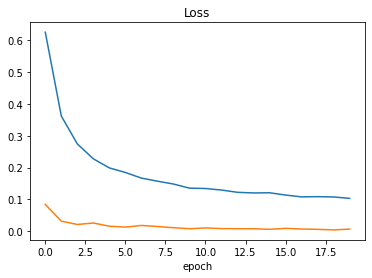

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

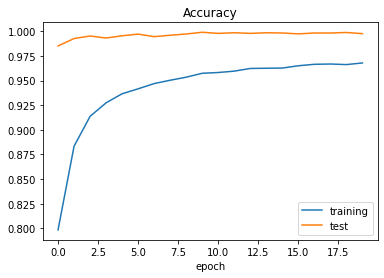

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [52]:
print(fTest.shape)
print(testLabels.shape)

(12630,)
(12630,)


In [63]:
testData=[]

for i in range(fTest.size) :
    image = cv2.imread( fTest[i])
    inited = init(image)   
    testData.append(np.array(inited))

testData = np.array(testData)
testLabels = np.array(testLabels)

print(testData.shape)
print(testLabels.shape)

(12630, 48, 48)
(12630,)


In [64]:
testData = testData.reshape(12630,48, 48,1)
testLabels = to_categorical(testLabels, 43)
print(testData.shape)
print(testLabels.shape)

(12630, 48, 48, 1)
(12630, 43)


In [65]:
assert(testData.shape[0] == testLabels.shape[0]), "The number of images is not equal to the number of labels."
assert(testData[0].shape == (48,48, 1)), "The dimensions of the images are not 32 x 32."
print('assertion true') 

assertion true


In [66]:
score = model.evaluate(testData, testLabels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06061875447630882
Test accuracy: 0.9851148128509521


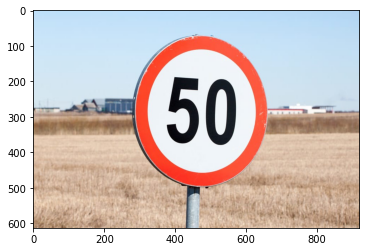

In [87]:
import requests

url = 'https://s.toptests.co.uk/wp-content/uploads/2017/04/50-miles-per-hour.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(48, 48)
(1, 48, 48, 1)


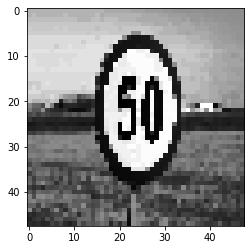

In [88]:
img = np.asarray(img)
img = cv2.resize(img, (48, 48))
img = init(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 48, 48, 1)
print(img.shape)


In [89]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [2]
